# 1. DATA EXPLORATION AND PREPROCESSING

# Import libraries and csv file

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_data



,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [3]:
test_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


# Exploration Data Analysis (EDA)

In [4]:
train_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
datetime,10886,10886,2011-01-01 00:00:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,10886.0,NaN,NaN,NaN,2.506614,1.116174,1.0,2.0,3.0,4.0,4.0
holiday,10886.0,NaN,NaN,NaN,0.028569,0.166599,0.0,0.0,0.0,0.0,1.0
workingday,10886.0,NaN,NaN,NaN,0.680875,0.466159,0.0,0.0,1.0,1.0,1.0
weather,10886.0,NaN,NaN,NaN,1.418427,0.633839,1.0,1.0,1.0,2.0,4.0
temp,10886.0,NaN,NaN,NaN,20.23086,7.79159,0.82,13.94,20.5,26.24,41.0
atemp,10886.0,NaN,NaN,NaN,23.655084,8.474601,0.76,16.665,24.24,31.06,45.455
humidity,10886.0,NaN,NaN,NaN,61.88646,19.245033,0.0,47.0,62.0,77.0,100.0
windspeed,10886.0,NaN,NaN,NaN,12.799395,8.164537,0.0,7.0015,12.998,16.9979,56.9969
casual,10886.0,NaN,NaN,NaN,36.021955,49.960477,0.0,4.0,17.0,49.0,367.0


In [5]:
train_data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [6]:
train_data.duplicated().sum()

0

# Distribution Plot on train data

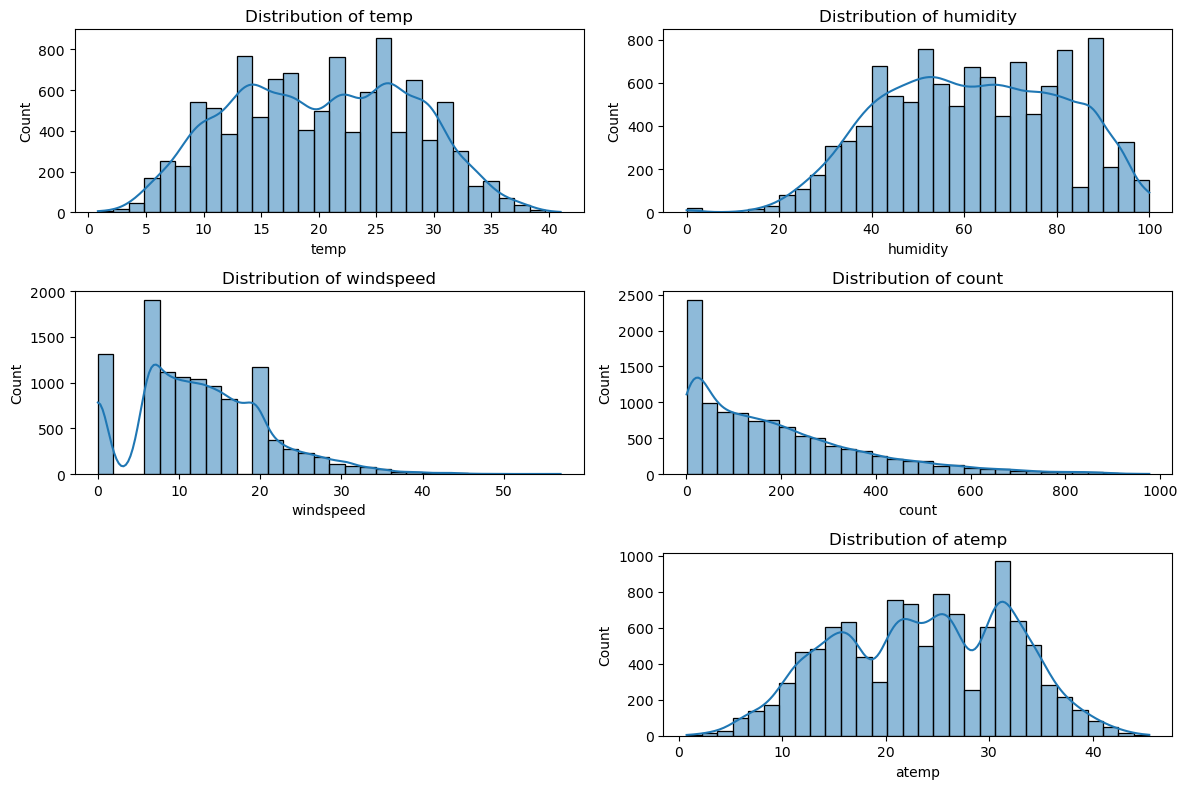

'\n a day with bad weather, a public holiday, or other special conditions could have no rentals, which is a valid entry.\n'

In [7]:
# 1. Data Distribution
plt.figure(figsize=(12, 8))

# Distribution of temp
plt.subplot(3, 2, 1)
sns.histplot(train_data['temp'], kde=True, bins=30)
plt.title('Distribution of temp')

# Distribution of humidity
plt.subplot(3, 2, 2)
sns.histplot(train_data['humidity'], kde=True, bins=30)
plt.title('Distribution of humidity')

# Distribution of windspeed
plt.subplot(3, 2, 3)
sns.histplot(train_data['windspeed'], kde=True, bins=30)
plt.title('Distribution of windspeed')

# Distribution of count
plt.subplot(3, 2, 4)
sns.histplot(train_data['count'], kde=True, bins=30)
plt.title('Distribution of count')


# Distribution of count
plt.subplot(3, 2, 6)
sns.histplot(train_data['atemp'], kde=True, bins=30)
plt.title('Distribution of atemp')



plt.tight_layout()
plt.show()


'''
 a day with bad weather, a public holiday, or other special conditions could have no rentals, which is a valid entry.
'''

# Distribution Plot on test data

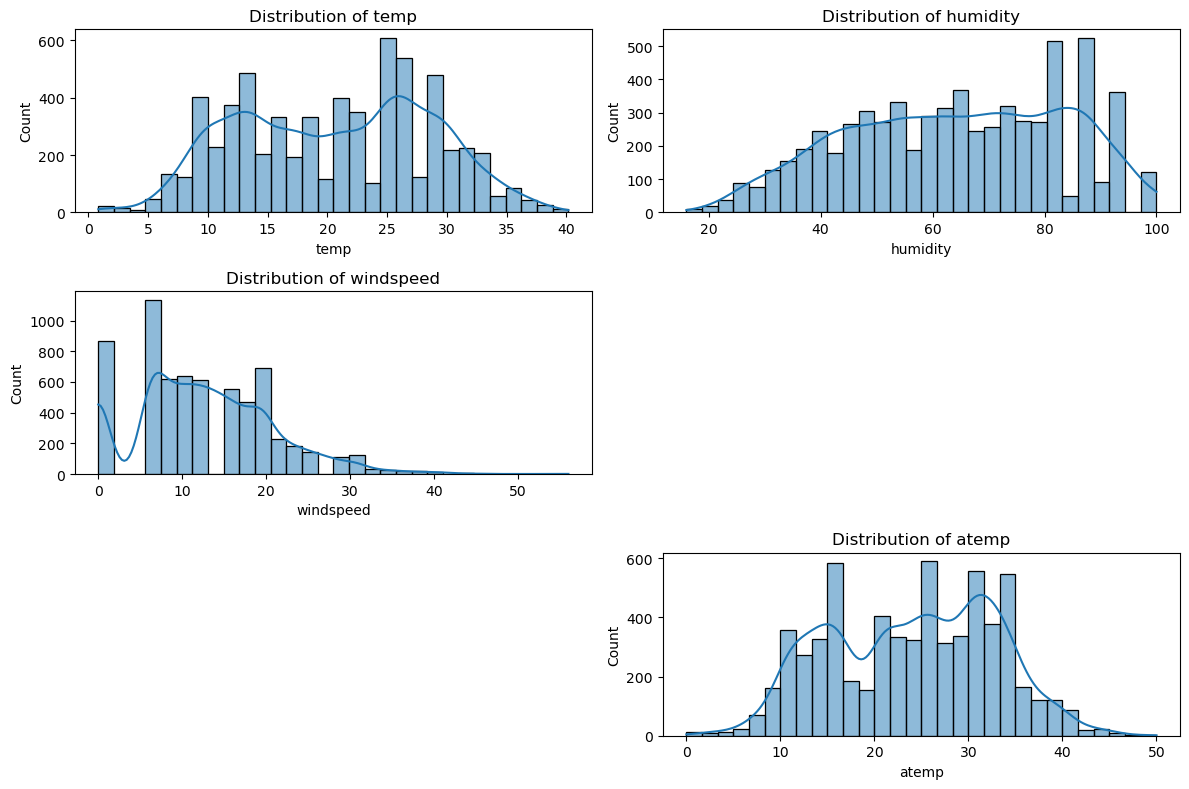

'\n a day with bad weather, a public holiday, or other special conditions could have no rentals, which is a valid entry.\n'

In [8]:
# 1. Data Distribution
plt.figure(figsize=(12, 8))

# Distribution of temp
plt.subplot(3, 2, 1)
sns.histplot(test_data['temp'], kde=True, bins=30)
plt.title('Distribution of temp')

# Distribution of humidity
plt.subplot(3, 2, 2)
sns.histplot(test_data['humidity'], kde=True, bins=30)
plt.title('Distribution of humidity')

# Distribution of windspeed
plt.subplot(3, 2, 3)
sns.histplot(test_data['windspeed'], kde=True, bins=30)
plt.title('Distribution of windspeed')


# Distribution of count
plt.subplot(3, 2, 6)
sns.histplot(test_data['atemp'], kde=True, bins=30)
plt.title('Distribution of atemp')



plt.tight_layout()
plt.show()


'''
 a day with bad weather, a public holiday, or other special conditions could have no rentals, which is a valid entry.
'''

# Handling Outiers of train data

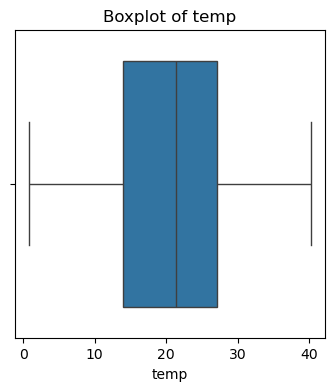

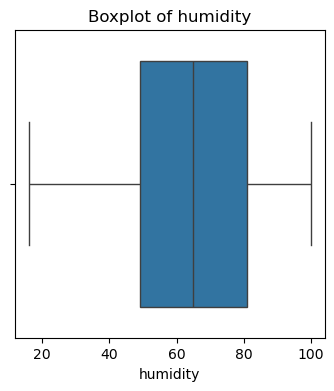

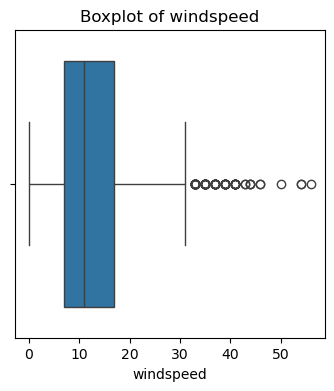

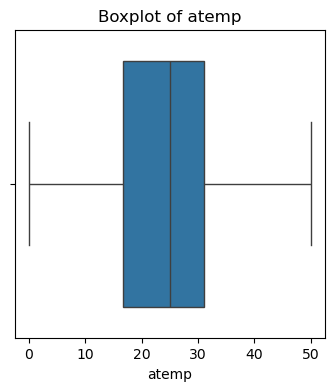

In [9]:

# Boxplot for 'temp'
plt.figure(figsize=(4, 4))
sns.boxplot(data=test_data, x='temp')
plt.title('Boxplot of temp')
plt.show()

# Boxplot for 'humidity'
plt.figure(figsize=(4, 4))
sns.boxplot(data=test_data, x='humidity')
plt.title('Boxplot of humidity')
plt.show()

# Boxplot for 'windspeed'
plt.figure(figsize=(4, 4))
sns.boxplot(data=test_data, x='windspeed')
plt.title('Boxplot of windspeed')
plt.show()


# Boxplot for 'atemp'
plt.figure(figsize=(4, 4))
sns.boxplot(data=test_data, x='atemp')
plt.title('Boxplot of atemp')
plt.show()

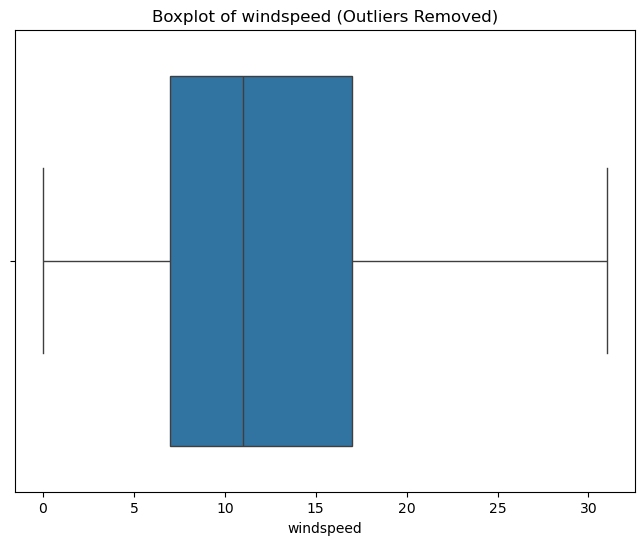

In [10]:
'''
We have found some outliers in windspeed, so we are going to remove them. 
since, distribution of windspeed is right skewed so we used IRQ method.

'''
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for 'windspeed'
Q1 = train_data['windspeed'].quantile(0.25)
Q3 = train_data['windspeed'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove rows where 'windspeed' is outside the bounds
train_data = train_data[(train_data['windspeed'] >= lower_bound) & (train_data['windspeed'] <= upper_bound)]

# Check the result by plotting the boxplot again
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for 'windspeed' after removing outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=train_data, x='windspeed')
plt.title('Boxplot of windspeed (Outliers Removed)')
plt.show()


# Handeling outliers of test_data

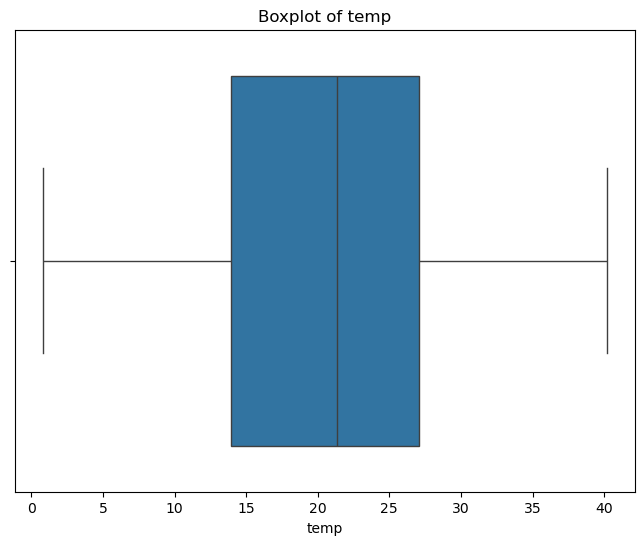

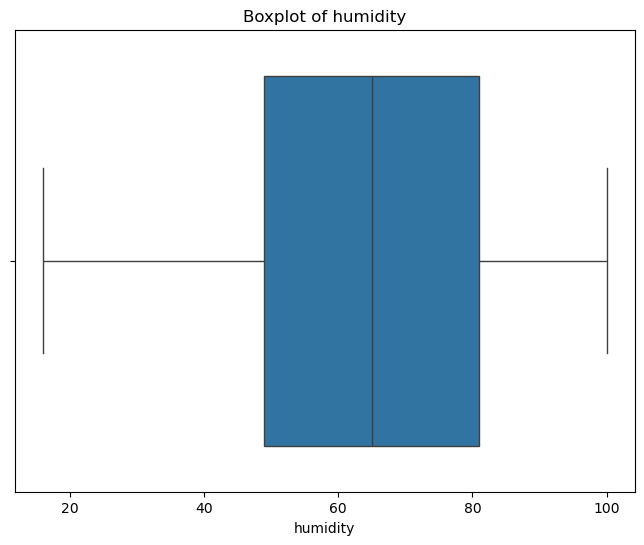

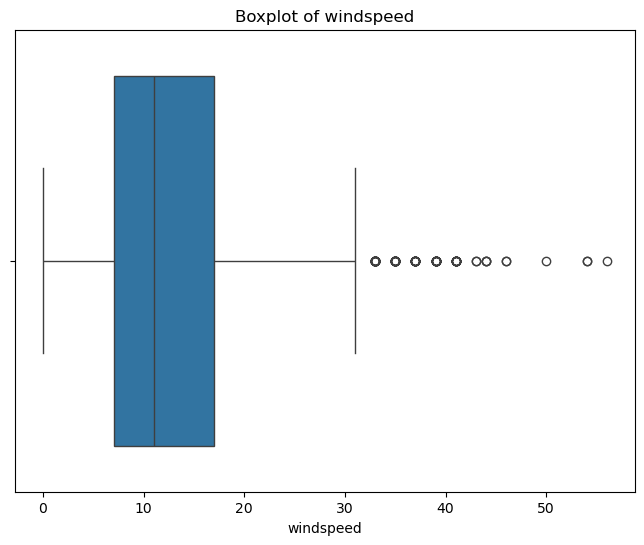

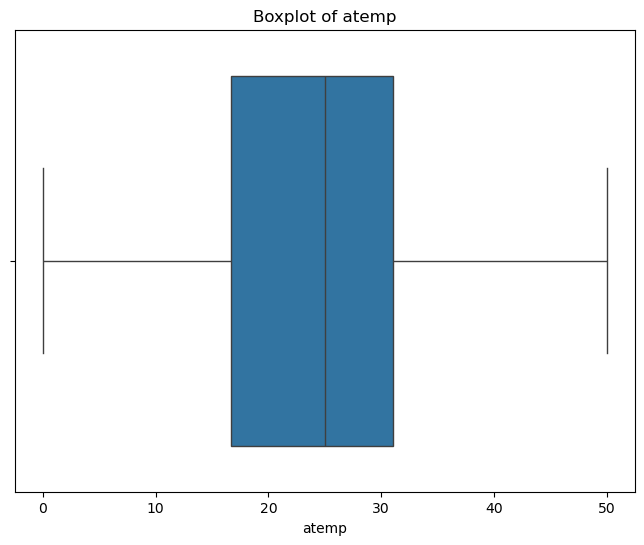

In [11]:

# Boxplot for 'temp'
plt.figure(figsize=(8, 6))
sns.boxplot(data=test_data, x='temp')
plt.title('Boxplot of temp')
plt.show()

# Boxplot for 'humidity'
plt.figure(figsize=(8, 6))
sns.boxplot(data=test_data, x='humidity')
plt.title('Boxplot of humidity')
plt.show()

# Boxplot for 'windspeed'
plt.figure(figsize=(8, 6))
sns.boxplot(data=test_data, x='windspeed')
plt.title('Boxplot of windspeed')
plt.show()


# Boxplot for 'atemp'
plt.figure(figsize=(8, 6))
sns.boxplot(data=test_data, x='atemp')
plt.title('Boxplot of atemp')
plt.show()

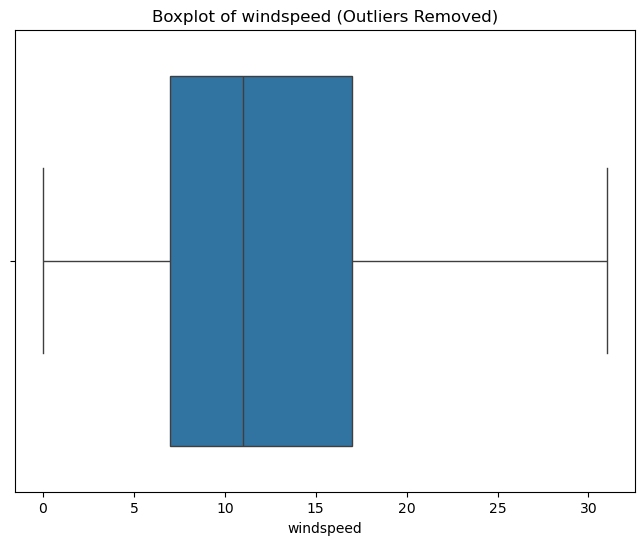

In [12]:
'''
We have found some outliers in windspeed, so we are going to remove them. 
since, distribution of windspeed is right skewed so we used IRQ method.

'''
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for 'windspeed'
Q1 = test_data['windspeed'].quantile(0.25)
Q3 = test_data['windspeed'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove rows where 'windspeed' is outside the bounds
test_data = test_data[(test_data['windspeed'] >= lower_bound) & (test_data['windspeed'] <= upper_bound)]

# Check the result by plotting the boxplot again
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for 'windspeed' after removing outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=test_data, x='windspeed')
plt.title('Boxplot of windspeed (Outliers Removed)')
plt.show()


# Replace Zeros in train and test data using group means

In [13]:

# Replace zeros in 'windspeed' with NaN in train and test datasets
train_data['windspeed'] = train_data['windspeed'].replace(0, np.nan)
test_data['windspeed'] = test_data['windspeed'].replace(0, np.nan)

# Calculate mean wind speed grouped by 'season' and 'weather' in train data
group_means = train_data.groupby(['season', 'weather'])['windspeed'].mean()

# Define a function to replace NaN using the calculated group means
def fill_windspeed_with_group_mean(row, group_means):
    if np.isnan(row['windspeed']):
        return group_means.get((row['season'], row['weather']), np.nan)
    return row['windspeed']

# Replace zeros (NaN) in train dataset using group means
train_data['windspeed'] = train_data.apply(
    lambda row: fill_windspeed_with_group_mean(row, group_means), axis=1
)

# Replace zeros (NaN) in test dataset using group means
test_data['windspeed'] = test_data.apply(
    lambda row: fill_windspeed_with_group_mean(row, group_means), axis=1
)

# Verify the replacement in both datasets
print("Train Data - Missing values in windspeed:", train_data['windspeed'].isnull().sum())
print("Test Data - Missing values in windspeed:", test_data['windspeed'].isnull().sum())


Train Data - Missing values in windspeed: 0
Test Data - Missing values in windspeed: 0


# Handling zero value in humidity

In [14]:
# Investigate unusual humidity values (e.g., 0)
train_data[train_data['humidity'] == 0].shape[0]


21

In [15]:
test_data[test_data['humidity'] == 0].shape[0]

0

In [16]:
# drop humidity rows with zero value
train_data = train_data[train_data['humidity'] != 0]
test_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.002700
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,15.931063
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,15.931063
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.001400
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.001400
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.001400
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.001400
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.001400
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.998100


# Convert datetime to useful features

In [17]:
# Convert datetime to useful features
for df in [train_data, test_data]:
    df['datetime'] = pd.to_datetime(df['datetime'])
    df['year'] = df['datetime'].dt.year
    df['month'] = df['datetime'].dt.month
    df['day'] = df['datetime'].dt.day
    df['hour'] = df['datetime'].dt.hour
    df.drop('datetime', axis=1, inplace=True)




# Normalize Numerical Features

In [18]:

# Normalize Numerical Features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical_columns = ['temp', 'atemp', 'humidity', 'windspeed']
train_data[numerical_columns] = scaler.fit_transform(train_data[numerical_columns])
test_data[numerical_columns] = scaler.transform(test_data[numerical_columns])



# Dataset split

In [19]:
from sklearn.model_selection import train_test_split

# Split train dataset into features and target
X = train_data.drop(columns=['casual', 'registered', 'count'])
y = train_data['count']

# Split training data into train and validation sets
X_train_split, X_val, y_train_split, y_val = train_test_split( X,y, test_size=0.2, random_state=42)

print('train data size:',train_data.shape)
print('X-train_split:',X_train_split.shape)
print('X_validation size:',X_val.shape)

train data size: (10638, 15)
X-train_split: (8510, 12)
X_validation size: (2128, 12)


# Import libraries and define models

In [20]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression 
from sklearn.svm import SVR  
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor 
from xgboost import XGBRegressor  
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np

# Define the models dictionary
models = {
    "Linear Regression": LinearRegression(),  # Linear regression model for basic linear relationships
    "Support Vector Regression": SVR(kernel='rbf', C=1.0, epsilon=0.1),  # Support Vector Regression (SVR) with RBF kernel
    "Random Forest Regressor": RandomForestRegressor(random_state=42, n_estimators=100),  # Random Forest with 100 estimators
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),  # Gradient Boosting Regressor
    "XGBoost Regressor": XGBRegressor(random_state=42, n_estimators=100)  # XGBoost with 100 estimators
}



# Model Training and Validation Performance

In [21]:
from sklearn.metrics import make_scorer

# Define custom scorers for the evaluation
def rmse_scorer(y_true, y_pred):
    """Root Mean Squared Error (RMSE) scorer"""
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mae_scorer(y_true, y_pred):
    """Mean Absolute Error (MAE) scorer"""
    return mean_absolute_error(y_true, y_pred)

def r2_scorer(y_true, y_pred):
    """R-squared (R²) scorer"""
    return r2_score(y_true, y_pred)
    
# Dictionaries to store performance metrics from the validation set
validation_rmse_results = {}
validation_mae_results = {}
validation_r2_results = {}

# Loop through each model in the models dictionary to evaluate its performance on the validation set
for name, model in models.items():
    
    # Train the model using the training data
    model.fit(X_train_split, y_train_split)
    
    # Make predictions on the validation set
    y_val_pred = model.predict(X_val)

    # Calculate performance metrics on the validation set
    rmse = rmse_scorer(y_val, y_val_pred) 
    mae = mean_absolute_error(y_val, y_val_pred)  
    r2 = r2_score(y_val, y_val_pred) 
    
    # Store the validation performance results for the current model
    validation_rmse_results[name] = rmse  
    validation_mae_results[name] = mae 
    validation_r2_results[name] = r2  

    # Output the validation performance of the current model
    print(f"{name} Performance (Validation Set):")
    print(f"  RMSE: {rmse:.4f}")  # .4f mean 4 decimal places
    print(f"  MAE: {mae:.4f}")  
    print(f"  R²: {r2:.4f}")  
    print()  # Print a blank line  between models


Linear Regression Performance (Validation Set):
  RMSE: 141.9274
  MAE: 106.5623
  R²: 0.4054

Support Vector Regression Performance (Validation Set):
  RMSE: 189.3625
  MAE: 139.8344
  R²: -0.0585

Random Forest Regressor Performance (Validation Set):
  RMSE: 43.1800
  MAE: 27.0156
  R²: 0.9450

Gradient Boosting Regressor Performance (Validation Set):
  RMSE: 64.4367
  MAE: 44.6334
  R²: 0.8774

XGBoost Regressor Performance (Validation Set):
  RMSE: 40.9024
  MAE: 26.6724
  R²: 0.9506



# K-fold Cross-Validation Performance

In [22]:

# Wrap the custom scoring functions using make_scorer
rmse_custom_scorer = make_scorer(rmse_scorer, greater_is_better=False)
mae_custom_scorer = make_scorer(mae_scorer, greater_is_better=False)
r2_custom_scorer = make_scorer(r2_scorer, greater_is_better=True)

# Dictionaries to store performance metrics from cross-validation
cv_rmse_results = {}
cv_mae_results = {}
cv_r2_results = {}

# Number of folds for cross-validation
k_folds = 5
# Loop through each model to perform K-fold cross-validation and calculate metrics for each fold
for name, model in models.items():
    
    # Perform K-fold cross-validation for RMSE, MAE, and R² metrics using custom scoring functions(for each fold)
    rmse_scores = cross_val_score(model, X_train_split, y_train_split, cv=k_folds, scoring=rmse_custom_scorer)  
    mae_scores = cross_val_score(model, X_train_split, y_train_split, cv=k_folds, scoring=mae_custom_scorer) 
    r2_scores = cross_val_score(model, X_train_split, y_train_split, cv=k_folds, scoring=r2_custom_scorer)
    
    # Calculate the mean of each metric across all K-folds
    mean_rmse = -np.mean(rmse_scores)  # negate because cross_val_score returns negative values
    mean_mae = -np.mean(mae_scores)  
    mean_r2 = np.mean(r2_scores)  
    
    # Store the cross-validation results for the current model
    cv_rmse_results[name] = mean_rmse  
    cv_mae_results[name] = mean_mae 
    cv_r2_results[name] = mean_r2  
    
    # Output the performance from K-fold cross-validation
    print(f"{name} Performance from {k_folds}-fold Cross-Validation:")
    print(f"  Mean RMSE from {k_folds}-fold CV: {mean_rmse:.4f}")  
    print(f"  Mean MAE from {k_folds}-fold CV: {mean_mae:.4f}")
    print(f"  Mean R² from {k_folds}-fold CV: {mean_r2:.4f}") 
    print()  


Linear Regression Performance from 5-fold Cross-Validation:
  Mean RMSE from 5-fold CV: 141.6190
  Mean MAE from 5-fold CV: 106.2049
  Mean R² from 5-fold CV: 0.3837

Support Vector Regression Performance from 5-fold Cross-Validation:
  Mean RMSE from 5-fold CV: 186.2061
  Mean MAE from 5-fold CV: 137.9466
  Mean R² from 5-fold CV: -0.0650

Random Forest Regressor Performance from 5-fold Cross-Validation:
  Mean RMSE from 5-fold CV: 44.5359
  Mean MAE from 5-fold CV: 28.1937
  Mean R² from 5-fold CV: 0.9390

Gradient Boosting Regressor Performance from 5-fold Cross-Validation:
  Mean RMSE from 5-fold CV: 66.8039
  Mean MAE from 5-fold CV: 45.5923
  Mean R² from 5-fold CV: 0.8628

XGBoost Regressor Performance from 5-fold Cross-Validation:
  Mean RMSE from 5-fold CV: 43.2051
  Mean MAE from 5-fold CV: 28.0971
  Mean R² from 5-fold CV: 0.9426



# Plot result

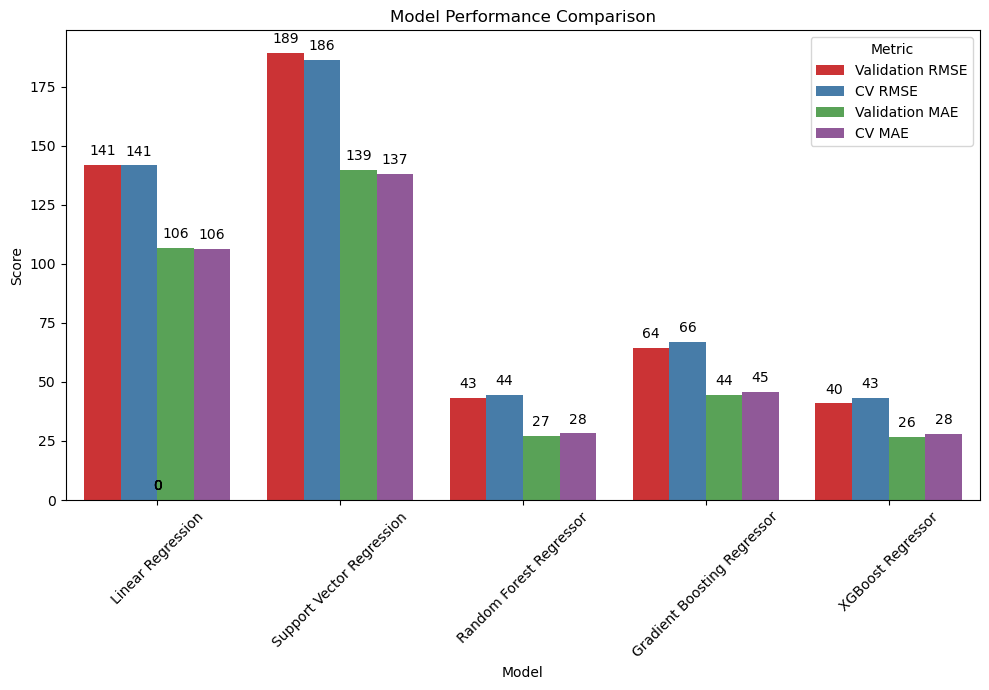

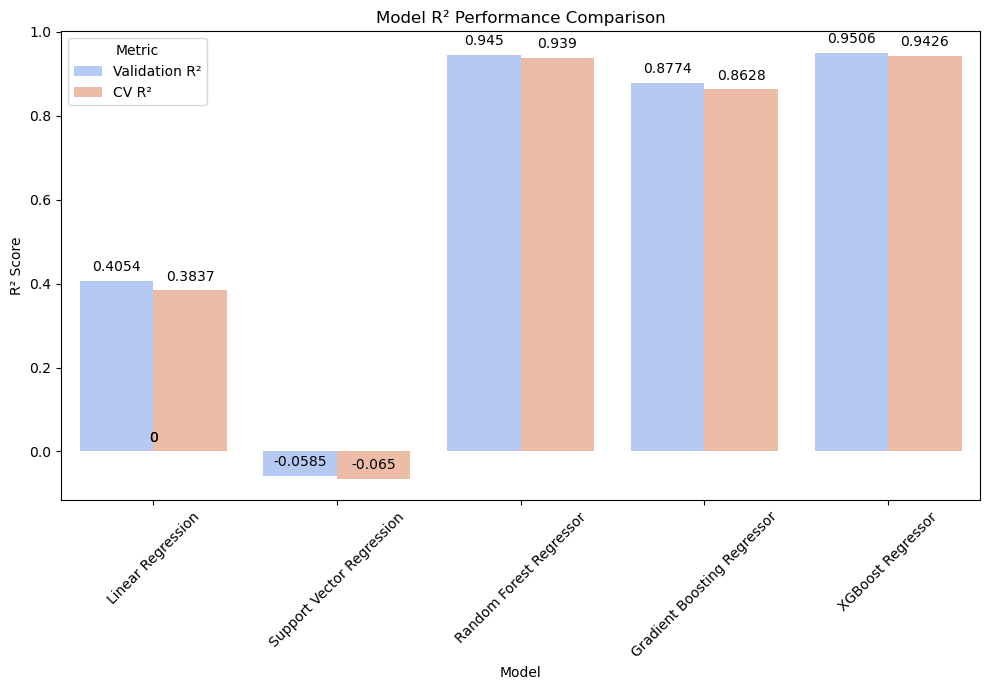

In [32]:

# Create a DataFrame for RMSE, MAE, and R² values
data = {
    'Model': list(validation_rmse_results.keys()),
    'Validation RMSE': list(validation_rmse_results.values()),
    'CV RMSE': list(cv_rmse_results.values()),
    'Validation MAE': list(validation_mae_results.values()),
    'CV MAE': list(cv_mae_results.values())
}

df = pd.DataFrame(data)
# Melt the DataFrame for easy plotting with seaborn
df_melted = df.melt(id_vars=["Model"], var_name="Metric", value_name="Score")
plt.figure(figsize=(10, 7))

# Use seaborn barplot with a brighter color palette
ax = sns.barplot(data=df_melted, x='Model', y='Score', hue='Metric', palette='Set1')  

# Add the rounded values at the top of each bar (as integers)
for p in ax.patches:
    value = int(p.get_height())
    ax.annotate(f'{value}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 10), textcoords='offset points')

# Customize the plot
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ---------------------- R² Graph ----------------------

# Create a new DataFrame for R² values
r2_data = {
    'Model': list(validation_r2_results.keys()),
    'Validation R²': list(validation_r2_results.values()),
    'CV R²': list(cv_r2_results.values())
}

r2_df = pd.DataFrame(r2_data)
r2_df_melted = r2_df.melt(id_vars=["Model"], var_name="Metric", value_name="Score")

# Plot R² values
plt.figure(figsize=(10, 7))
ax = sns.barplot(data=r2_df_melted, x='Model', y='Score', hue='Metric', palette='coolwarm')

# Add the values at the top of each bar (R² with 4 decimals)
for p in ax.patches:
    value = round(p.get_height(), 4)
    ax.annotate(f'{value}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 10), textcoords='offset points')

# Customize the plot
plt.title('Model R² Performance Comparison')
plt.ylabel('R² Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Recursive Feature Elimination

In [24]:
from sklearn.feature_selection import RFE
from xgboost import XGBRegressor  # Use XGBClassifier for classification tasks

# Step 1: Initialize the XGBoost model
xgb_model = XGBRegressor(random_state=42)

# Step 2: Initialize RFE with XGBoost as the estimator and specify the number of features to select
rfe = RFE(estimator=xgb_model, n_features_to_select=5)  # Select top 5 features

# Step 3: Fit RFE to your data
rfe.fit(X_train_split, y_train_split)

# Step 4: Retrieve the selected features
selected_features = X_train_split.columns[rfe.support_]
print("Selected Features:", selected_features)


Selected Features: Index(['season', 'workingday', 'temp', 'year', 'hour'], dtype='object')


# Hyperparameter Tuning on RMSE 

In [31]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
import xgboost as xgb
from xgboost import XGBRegressor

# Define RMSE scorer
def rmse_scorer(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Create the RMSE custom scorer
rmse_custom_scorer = make_scorer(rmse_scorer, greater_is_better=False)

# Define hyperparameters for XGBoost
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 6, 9],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# Create the XGBRegressor model
xgb_model = XGBRegressor()

# Create the GridSearchCV object with RMSE as the scoring metric
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring=rmse_custom_scorer, cv=5, verbose=1)

# Fit the grid search on your data
grid_search.fit(X_train_split, y_train_split)

# Print the best parameters and RMSE score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best RMSE: {grid_search.best_score_}")


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 300, 'subsample': 0.8}
Best RMSE: -40.72789782391657


In [29]:
from xgboost import XGBRegressor
import numpy as np

# Prepare training features and log-transform the target
X_train = train_data.drop(columns=['count', 'casual', 'registered'])
y_train = np.log1p(train_data['count'])  # Log-transform the target

# Prepare testing features
X_test = test_data.drop(columns=['count'], errors='ignore')

# Initialize the XGBRegressor model with the best parameters
xgb_model = XGBRegressor(
    colsample_bytree=1.0,
    learning_rate=0.1,
    max_depth=6,
    n_estimators=300,
    subsample=0.8,
    random_state=42,
    objective='reg:squaredlogerror'  # Log-scaled objective
)

# Train the model on log-transformed target
xgb_model.fit(X_train, y_train)

# Predict on the test dataset
test_predictions_log = xgb_model.predict(X_test)

# Reverse the log transformation and clip predictions
test_predictions = np.expm1(test_predictions_log).clip(min=0)

# Convert predictions to integers
test_predictions = test_predictions.round().astype(int)

# Add predictions and original count to the test data
test_data_with_predictions = test_data.copy()

# Add the predicted count
test_data_with_predictions['predicted_count'] = test_predictions

# If the original 'count' column exists in the test dataset, retain it for comparison and convert it to integer
if 'count' in test_data.columns:
    test_data_with_predictions['original_count'] = test_data['count'].astype(int)

# Save the full test data with predictions and original count (if present) to a CSV file
test_data_with_predictions.to_csv('test_predictions_with_all_columns.csv', index=False)

print("Predictions saved to test_predictions_with_all_columns.csv")


Predictions saved to test_predictions_with_all_columns.csv


In [30]:
test_data_with_predictions

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,predicted_count
0,1,0,1,1,0.244898,0.237275,0.521739,0.800054,2011,1,20,0,9
1,1,0,1,1,0.244898,0.288064,0.521739,0.397151,2011,1,20,1,4
2,1,0,1,1,0.244898,0.288064,0.521739,0.397151,2011,1,20,2,4
3,1,0,1,1,0.244898,0.271171,0.521739,0.199946,2011,1,20,3,2
4,1,0,1,1,0.244898,0.271171,0.521739,0.199946,2011,1,20,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,1,0,1,2,0.244898,0.271171,0.565217,0.199946,2012,12,31,19,270
6489,1,0,1,2,0.244898,0.271171,0.565217,0.199946,2012,12,31,20,177
6490,1,0,1,1,0.244898,0.271171,0.565217,0.199946,2012,12,31,21,147
6491,1,0,1,1,0.244898,0.288064,0.521739,0.119807,2012,12,31,22,117
